In [12]:
from Bio import SeqIO
import matplotlib.pyplot as plt

In [13]:
# Load the FASTQ file
fastq_file = "SRR17066006.fastq"
records = SeqIO.parse(fastq_file, "fastq")

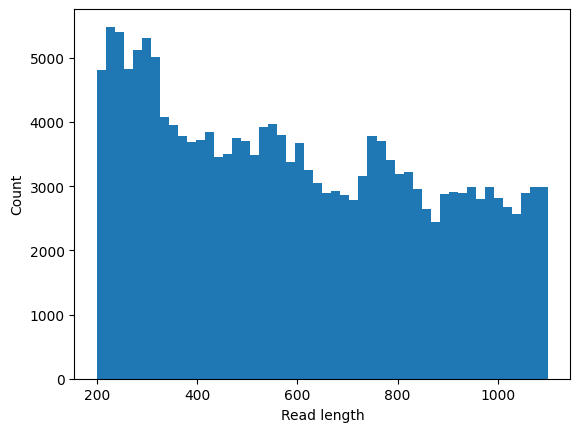

In [14]:
# Plot a histogram of read lengths
read_lengths = [len(rec) for rec in records]
plt.hist(read_lengths, bins=50)
plt.xlabel("Read length")
plt.ylabel("Count")
plt.show()

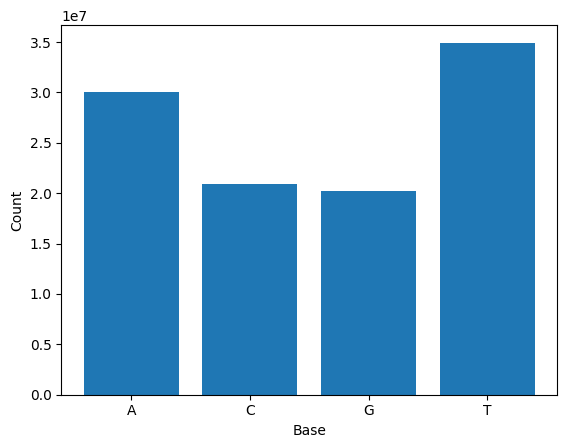

In [15]:
fastq_file = "SRR17066006.fastq"
records = SeqIO.parse(fastq_file, "fastq")
counts = {"A": 0, "C": 0, "G": 0, "T": 0}
for record in records:
    for base in record.seq:
        if base.upper() in counts:
            counts[base.upper()] += 1
plt.bar(counts.keys(), counts.values())
plt.xlabel("Base")
plt.ylabel("Count")
plt.show()

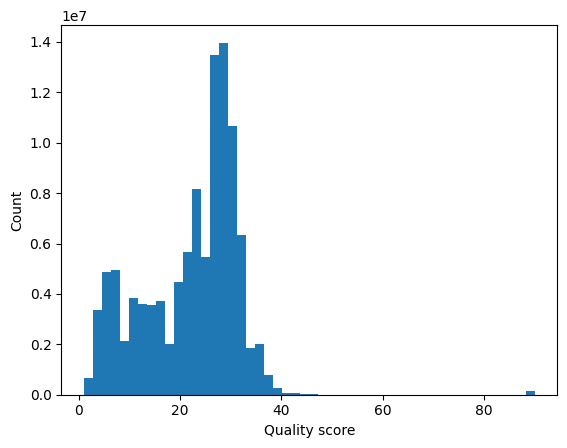

In [16]:
# Calculate and plot the quality distribution of the reads
fastq_file = "SRR17066006.fastq"
records = SeqIO.parse(fastq_file, "fastq")
qualities = []
for record in records:
    for quality in record.letter_annotations["phred_quality"]:
        qualities.append(quality)
plt.hist(qualities, bins=50)
plt.xlabel("Quality score")
plt.ylabel("Count")
plt.show()